In [30]:
pip install yfinance


     ---------------------------------------- 65.6/65.6 kB 1.8 MB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ---------------------------------------- 2.9/2.9 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135767 sha256=302e3987ff5c26d0c57e081659ed6bb61624ccd33ebcd6e6a6333a5e71f6a270
  Stored in directory: c:\users\nehal\appdata\local\pip\cache\wheels\e2\b9\da\716514851b65304b2d24f2a161398b9470da589b08a5a586c8
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: req

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')


ModuleNotFoundError: No module named 'numpy'

In [33]:
#Stock Quote
import yfinance as yf

# Stock Quote
df = yf.download('M&M.NS', start='2012-01-1', end='2023-10-18')
print(df)



[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03  109.469765  111.091095  109.469765  110.250404   86.026520   
2012-01-04  109.950157  111.691589  109.770012  111.451393   86.963638   
2012-01-05  110.850899  111.691589  109.830063  111.391342   86.916779   
2012-01-06  112.472229  112.832520  111.451393  111.991837   87.385345   
2012-01-09  112.532272  113.372963  111.451393  113.252869   88.369301   
...                ...         ...         ...         ...         ...   
2023-10-11  112.000000  113.400002  111.809998  113.260002  113.260002   
2023-10-12  113.500000  113.739998  110.760002  111.330002  111.330002   
2023-10-13  111.300003  111.470001  108.660004  109.379997  109.379997   
2023-10-16  109.889999  110.919998  107.989998  109.139999  109.139999   
2023-10-17  108.750000  110.690002  108.059

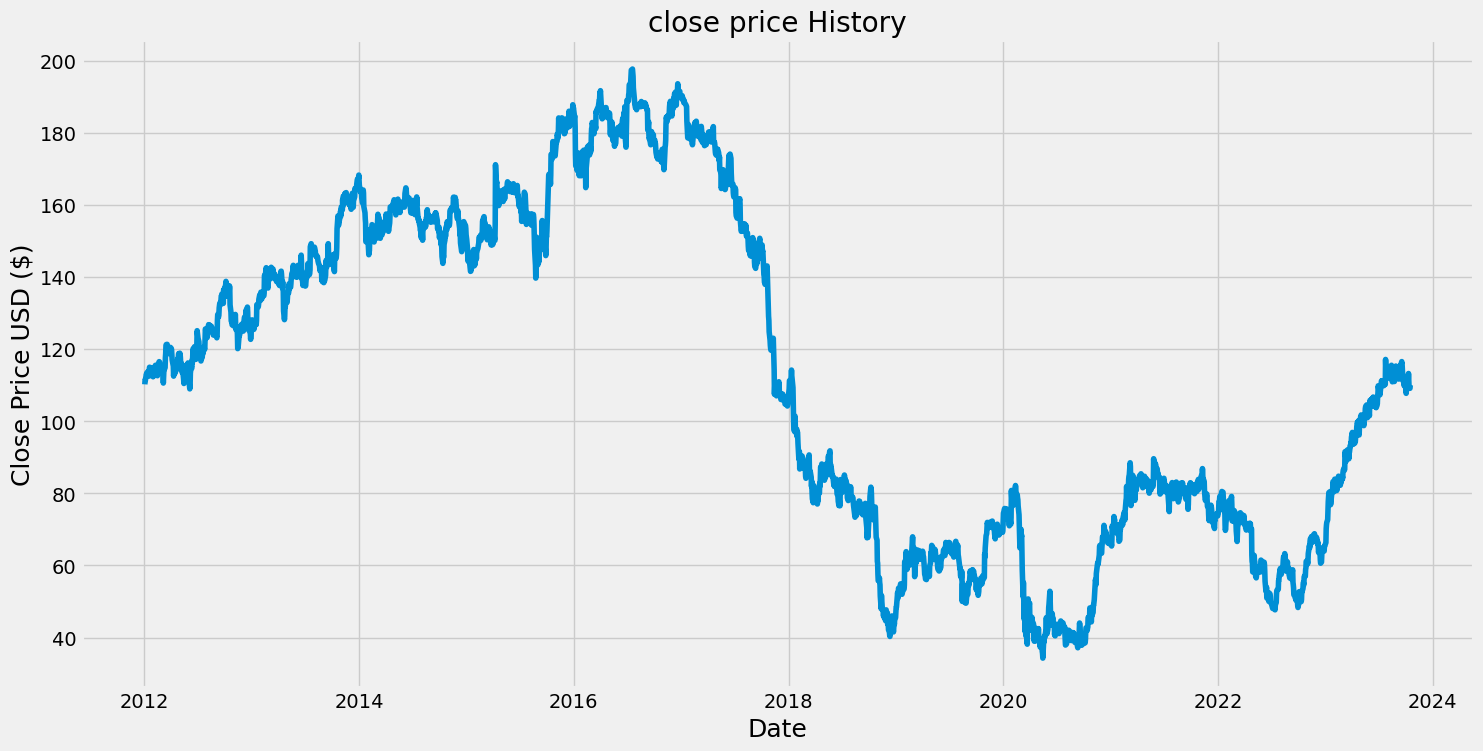

In [34]:
plt.figure(figsize = (16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [35]:
data = df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2374

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.4647397 ],
       [0.47208715],
       [0.47171977],
       ...,
       [0.45941469],
       [0.45794642],
       [0.4633301 ]])

In [42]:
train_data = scaled_data[0:training_data_len ,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    x_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.4647397 , 0.47208715, 0.47171977, 0.4753935 , 0.48310829,
       0.47796508, 0.48384301, 0.48567987, 0.48237352, 0.4786998 ,
       0.48898622, 0.49376204, 0.49376204, 0.48604725, 0.48237352,
       0.49302733, 0.49082308, 0.4893536 , 0.48457777, 0.4775977 ,
       0.47980194, 0.47906718, 0.48898622, 0.49008836, 0.49486419,
       0.49706839, 0.49302733, 0.48384301, 0.49082308, 0.48604725,
       0.47943456, 0.48861883, 0.49853787, 0.5033137 , 0.50257898,
       0.49964002, 0.49706839, 0.49082308, 0.49412942, 0.49008836,
       0.49265994, 0.48714935, 0.48274091, 0.46694394, 0.47980194,
       0.4893536 , 0.48972098, 0.49302733, 0.50992639, 0.51727384,
       0.53086661, 0.53233609, 0.53270342, 0.52756021, 0.52756021,
       0.51947804, 0.51690646, 0.5268255 , 0.52645812, 0.52535602]), 0.5231517695975194]
[]

[array([0.4647397 , 0.47208715, 0.47171977, 0.4753935 , 0.48310829,
       0.47796508, 0.48384301, 0.48567987, 0.48237352, 0.4786998 ,
       0.48898622, 0.49376204, 0.4

In [49]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
import numpy as np

# Assuming x_train is a list or another iterable
x_train = np.array(x_train)

# Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)

IndexError: tuple index out of range